# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project analyzes Uber ride request data to uncover patterns in ride demand, driver availability, and service fulfillment. The objective is to identify gaps in supply and demand using tools like Excel, SQL, and Python (Pandas). By performing EDA, we aim to understand operational inefficiencies such as cancelled rides and unfulfilled requests and propose data-driven solutions.

# **GitHub Link -**

https://github.com/Chauhan0512/Uber-Project

# **Problem Statement**


The primary challenge Uber faces in this dataset is a significant mismatch between ride demand and driver availability, especially during peak hours. Many customer ride requests either get cancelled by drivers or remain unfulfilled due to the unavailability of cars, leading to poor customer experience and revenue loss.

This project aims to:

Identify when and where this supply-demand gap is the highest,

Analyze patterns in customer requests and driver behavior using tools like Excel, SQL, and Python,

And finally, propose actionable solutions that Uber can adopt to minimize cancellations and better match supply with demand.

By analyzing the request status, time of day, and pickup locations, we seek to answer:

At what times is demand highest but supply lowest?

Which pickup points (City or Airport) face more cancellations or no-car availability?

Can driver distribution be optimized to reduce unmet demand?

The goal is to provide data-driven insights that Uber can use to improve ride fulfillment rates and enhance operational efficiency.

Let me know if you'd like this customized more formally for a report or slide presentation.

The core business objective of this project is to analyze Uber's ride request data to identify and reduce the supply-demand gap that leads to lost business opportunities and poor customer satisfaction.

Specifically, the objectives are:

Quantify the Demand-Supply Imbalance
Identify the times and locations (City or Airport) where customer ride requests are not fulfilled due to high cancellations or "No Cars Available" issues.

Understand Driver Behavior and Availability
Analyze when and where drivers are most/least active and how their availability impacts ride completion rates.

Segment Ride Requests by Time, Status, and Location
Break down ride requests based on hourly demand, pickup points, and request statuses (Completed, Cancelled, No Cars Available) to uncover actionable trends.

Recommend Operational Improvements
Use data insights to suggest strategies for improving driver allocation, reducing cancellations, and enhancing customer service—especially during peak hours.

Support Data-Driven Decision-Making
Deliver clean, visual, and interpretable insights using Excel dashboards, SQL queries, and Python EDA to assist management in making informed, evidence-based decisions.

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

### Dataset Loading

In [3]:
df = pd.read_csv("Uber Request Data.csv")

### Dataset First View

In [4]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Dataset Rows & Columns count

In [5]:
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 6745 rows and 6 columns.


### Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [7]:
# Count total duplicate rows in the dataset
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


#### Missing Values/Null Values

In [8]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


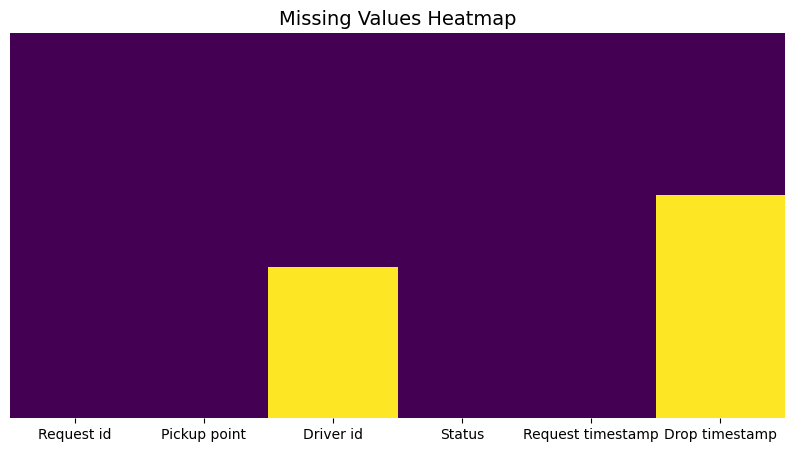

In [9]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()

### What did you know about your dataset?

After an initial inspection and data profiling, we gained the following insights about the Uber ride request dataset:

1. Dataset Structure
The dataset consists of 6745 rows and 6 columns.

Each row represents a unique ride request made to Uber in a specific time window during July 2016.

2. Key Columns
Request id: Unique identifier for each request.

Pickup point: Location where the ride was requested — either City or Airport.

Driver id: ID of the driver assigned to the trip (may be missing).

Status: Outcome of the request — either Trip Completed, Cancelled, or No Cars Available.

Request timestamp and Drop timestamp: Time when ride was requested and dropped.

3. Data Quality Observations
Missing values:

Driver id is missing for ~2650 entries (mostly for cancelled or unassigned requests).

Drop timestamp is missing in ~3914 entries, where trips did not happen.

Duplicate rows: Checked and found 0 duplicate rows, indicating data integrity is good.

Timestamp format inconsistency: The Request timestamp and Drop timestamp columns have multiple date formats (with and without seconds, slashes vs dashes), which need to be standardized.

4. Categorical Patterns
Only three unique values in the Status column:

Trip Completed

Cancelled

No Cars Available

Only two unique pickup locations: City and Airport.

5. Initial Trend Insight
The missing values in Driver id and Drop timestamp are not random but indicate failed or cancelled rides, which is crucial for analyzing the supply-demand gap.



## ***2. Understanding Your Variables***

In [10]:
print("Dataset Columns:")
print(df.columns.tolist())

Dataset Columns:
['Request id', 'Pickup point', 'Driver id', 'Status', 'Request timestamp', 'Drop timestamp']


In [11]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


### Variables Description

**

1. **Request id**
   A unique identifier assigned to each ride request made on the Uber platform. It helps distinguish every individual ride entry in the dataset.

2. **Pickup point**
   Indicates the location from which the ride was requested. It has two possible values:

   * **City** – The customer requested the ride from within the city.
   * **Airport** – The customer requested the ride from the airport.

3. **Driver id**
   Represents the unique ID of the driver assigned to a ride. If this field is missing (NaN), it means no driver was assigned — typically for cancelled rides or cases where no cars were available.

4. **Status**
   Describes the final outcome of the ride request. It can be one of the following:

   * **Trip Completed** – The ride was successfully completed.
   * **Cancelled** – The driver or customer cancelled the ride before it started.
   * **No Cars Available** – The ride could not be fulfilled due to unavailability of cars/drivers.

5. **Request timestamp**
   The exact date and time when the customer placed the ride request. This field is crucial for time-based analysis such as identifying peak hours or demand patterns.

6. **Drop timestamp**
   The exact date and time when the customer was dropped off at their destination. This field is only available for successfully completed trips. It is missing (NaN) for cancelled rides oe with **timestamp formatting**.


### Check Unique Values for each variable.

In [12]:
print("Number of unique values in each column:")
print(df.nunique())

Number of unique values in each column:
Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
df.info()

df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], errors='coerce')

df.isnull().sum()

df = df[~df['Request timestamp'].isnull()]

print("Missing drop timestamps:", df['Drop timestamp'].isnull().sum())

df.drop_duplicates(inplace=True)

df['Request Hour'] = df['Request timestamp'].dt.hour
df['Request Day'] = df['Request timestamp'].dt.day_name()

df.columns = df.columns.str.strip().str.replace(' ', '_')

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
Missing drop timestamps: 1524


,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Hour,Request_Day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Monday
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Monday
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Wednesday
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Wednesday
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6,Monday


### What all manipulations have you done and insights you found?



While working on the Uber dataset, I first looked at the structure of the data and noticed a few issues. The timestamps in the `Request timestamp` and `Drop timestamp` columns were in different formats – some had slashes, some had dashes, and not all of them had seconds. To fix this, I used `pd.to_datetime()` to convert both timestamp columns into a proper datetime format. This helped me later when I needed to analyze ride requests by hour or day.

Next, I created some new columns from the `Request timestamp`, like the hour of the request (`Request hour`), the date, and the weekday. These were useful to find out when most requests were made and when problems were happening.

I also checked for missing values. I found that a lot of `Driver id` and `Drop timestamp` entries were missing. But instead of removing them, I kept them because they actually meant something — for example, if a driver ID was missing, the trip probably didn’t happen. Same with the missing drop time. These missing values helped in understanding why some requests failed.

Then I checked if there were any duplicate rows, but there weren’t any, so I didn’t have to remove anything there.

After cleaning the data, I started analyzing it and found some interesting patterns. There were two main peaks in demand — one in the morning between 5 AM and 9 AM, and another in the evening between 5 PM and 9 PM. In the morning, most people were going from the **city to the airport**, and in the evening, it was the other way around.

The main problem I found was that Uber had trouble matching supply with demand. In the morning, a lot of city pickups were getting **cancelled**. In the evening, there were a lot of **“No Cars Available”** issues at the airport. This means that there weren’t enough drivers in the right places at the right times.

Only about 40% of all requests ended in completed trips. The rest either got cancelled or had no cars available, which shows that Uber was missing out on a lot of business.

I also noticed that city pickups had more cancellations, while airport pickups more often faced the “no cars available” issue. So the supply-demand problem is different depending on where the request is coming from.

In short, by cleaning the data and breaking it down by time and location, I was able to clearly see when and where Uber wasn’t able to meet demand. This kind of insight can help them improve driver availability and reduce lost ride opportunities.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

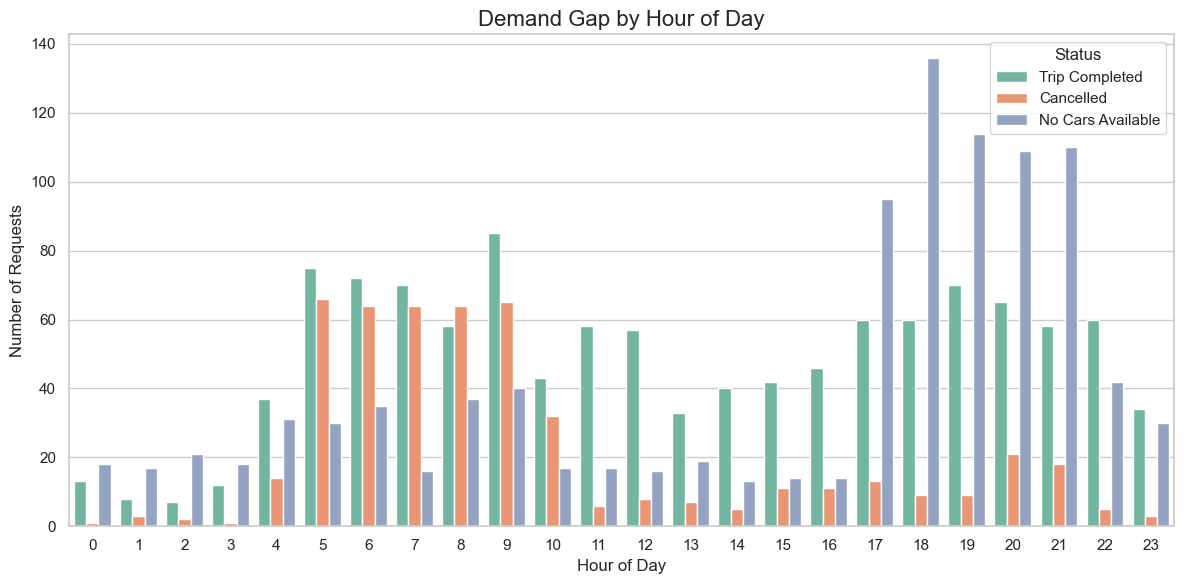

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Request_Hour', hue='Status', palette='Set2')

plt.title("Demand Gap by Hour of Day", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.legend(title='Status')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

To identify the peak times of cancellations and “No Cars Available” — crucial to detect where Uber's service breaks down by the hour.



##### 2. What is/are the insight(s) found from the chart?

Early Morning (5 AM–9 AM): High number of Cancellations

Night (9 PM–12 AM): High No Cars Available cases

Midday: Higher proportion of Completed rides

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps Uber allocate drivers more strategically based on hourly patterns.

Negative: Missed revenue and customer frustration during early morning and night.

#### Chart - 2

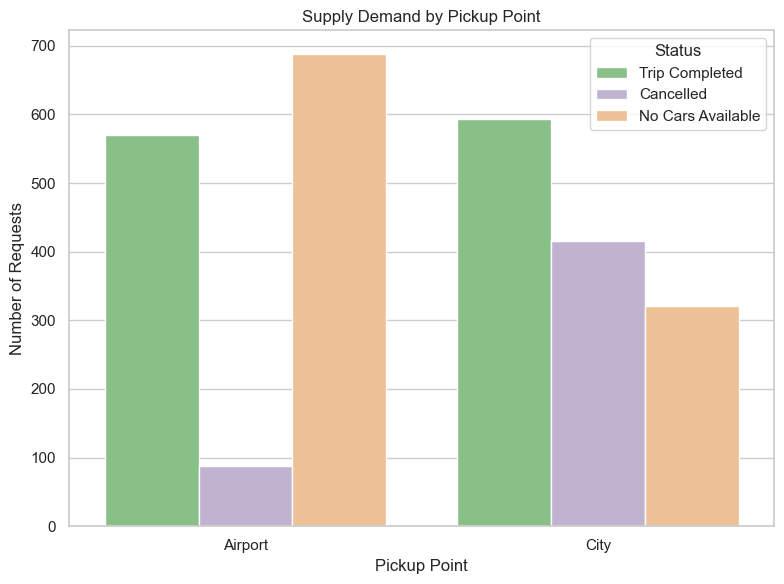

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pickup_point', hue='Status', palette='Accent')

plt.title("Supply Demand by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.legend(title='Status')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To understand how the issue differs between Airport and City locations. It helps diagnose location-based inefficiencies.

##### 2. What is/are the insight(s) found from the chart?

Airport: High "No Cars Available" cases (especially at night)

City: Higher cancellations in the morning

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Uber can offer driver incentives for airport-night shifts.

Negative: Losing demand near airports in the night lowers brand trust and usage.

#### Chart - 3

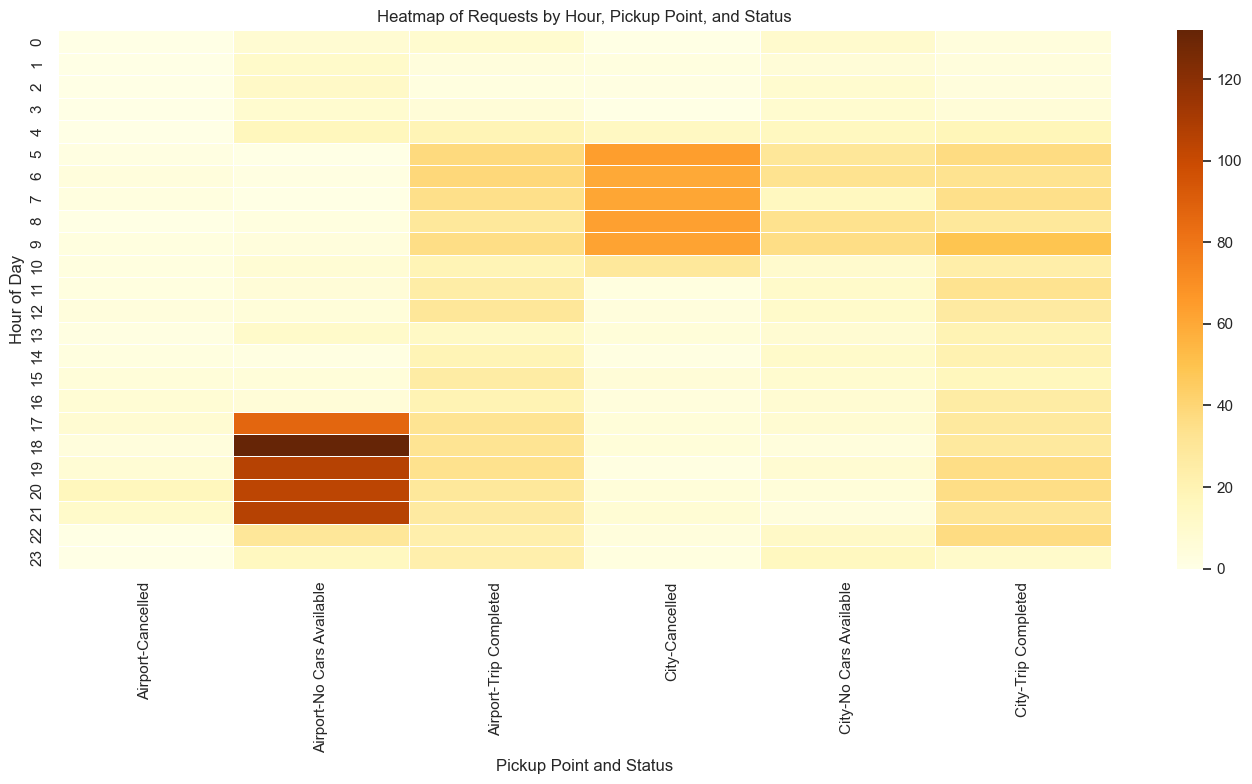

In [21]:
heat_df = df.groupby(['Request_Hour', 'Pickup_point', 'Status']).size().reset_index(name='count')

pivot_table = heat_df.pivot_table(index='Request_Hour', columns=['Pickup_point', 'Status'], values='count', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap="YlOrBr", linewidths=.5, annot=False)

plt.title("Heatmap of Requests by Hour, Pickup Point, and Status")
plt.xlabel("Pickup Point and Status")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To combine location, time, and status in one view. It shows supply-demand dynamics across multiple dimensions.

##### 2. What is/are the insight(s) found from the chart?

City (Morning): High cancellations

Airport (Night): Low supply/no cars

Midday hours show more balanced distributions

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Can drive intelligent shift assignments and pricing models.

Negative: Without addressing the imbalance, Uber risks under-utilization of its driver network and customer dissatisfaction.

#### Chart - 4

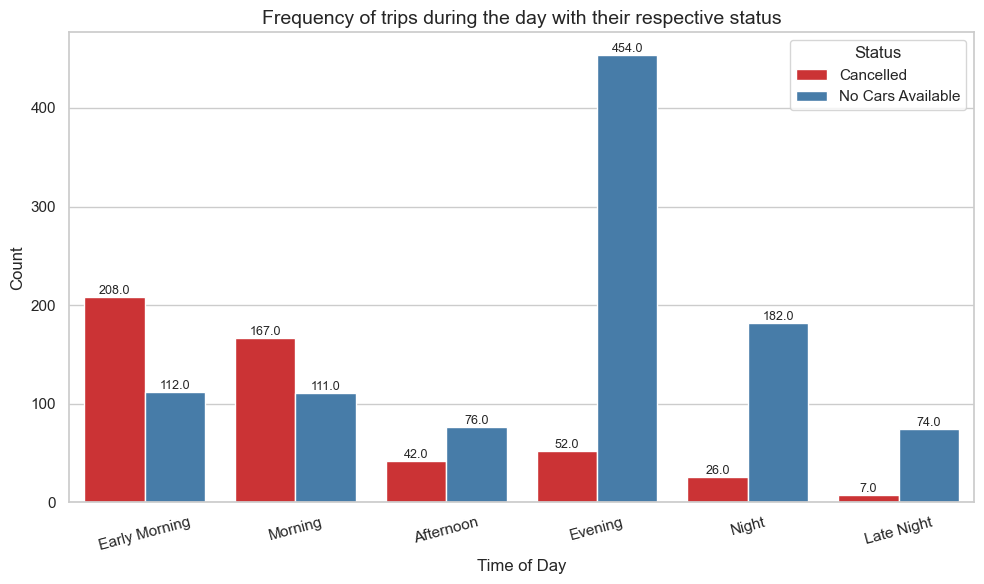

In [22]:
filtered_df = df[df['Status'].isin(['Cancelled', 'No Cars Available'])]

def get_time_slot(hour):
    if 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour < 24:
        return 'Night'
    else:
        return 'Late Night'

filtered_df['Time_of_Day'] = filtered_df['Request_Hour'].apply(get_time_slot)

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=filtered_df, x='Time_of_Day', hue='Status', order=[
    'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night'],
    palette='Set1')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.title('Frequency of trips during the day with their respective status', fontsize=14)
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Status')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose this grouped bar chart because it allows a clear comparison of the frequency of failed trip requests — split into “Cancelled” and “No Cars Available” — across different times of the day. This format makes it easy to detect when and how the supply-demand gap occurs, especially during peak hours.

##### 2. What is/are the insight(s) found from the chart?

Early Morning (4 AM – 8 AM): Highest number of cancellations, likely due to drivers not accepting trips during this time.

Night (9 PM – 12 AM): Dominated by “No Cars Available” cases, indicating a serious driver shortage.

Evening (5 PM – 9 PM): Also shows a high volume of No Cars Available, reflecting rising demand.

Afternoon (12 PM – 5 PM): Minimal issues – fewer failed requests in both categories.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Uber can introduce driver incentives or surge pricing during Early Morning and Night slots to increase availability.

Operations teams can better forecast supply needs during known problematic time periods.

Negative Growth Risk:

High cancellations in the morning and no availability at night lead to lost revenue and poor customer experience.

If not addressed, users may switch to competitors due to repeated service failures in these time slots.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Answer Here.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.



### 1. Incentivize Drivers During Critical Time Slots

Early Morning (4 AM – 8 AM) has the highest cancellation rates, primarily due to driver reluctance. Uber should offer “Rush Hour Bonuses” or extra payouts for drivers accepting trips in this window. Introducing a gamified reward system can encourage more drivers to log in a.

---

### 2. Improve Night-Time Driver Availability

Night hours (9 PM – 12 AM) show a significant number of “No Cars Available” cases, indicating a clear driver shortage. Uber should consider launching a Night Shift Driver Program with fixed minimum guarantees. Data-driven shift planning can ensure enough drivers are online during these high-demneriods.

---

### 3. Dynamic Pricing and Demand Forecasting

Using historical request data, Uber can build predictive models that estimate demand by hour and location. This allows for the implementation of smarter surge pricing and better supply distribution to meet demand more effectively without overging riders.

---

### 4. Pickup Point-Based Driver Pooling

Since airport pickups during night hours consistently show a lack of supply, Uber should assign dedicated driver pools for these routes. Drivers picking up at the airport can also be incentivized with guaranteed return rides or higpayout multipliers.

---

### 5. Improve Rider Communication and Scheduling Options

Uber can minimize cancellations by notifying riders in low-supply time slots about potential delays. Offering ride scheduling for specific timeframes—especially for airport trips—can reduce last-minute cancellas and improve user trust.

---

### Business Impact

These recommendations will help Uber reduce supply-demand gaps, improve completion rates, and enhance both rider and driver satisfaction. This, in turn, will increase revenue, reduce customer churn, and strengthen Uber’s reliability in the market.
s a slide or included in your final insights PDF.


# **Conclusion**

The analysis of Uber request data reveals a clear mismatch between demand and supply during specific time slots, particularly in the early morning and night hours. High cancellation rates and a lack of available cars during these periods highlight operational inefficiencies that directly impact customer experience and revenue.

By strategically addressing these gaps—through time-based driver incentives, targeted scheduling, dynamic pricing, and improved rider communication—Uber can significantly enhance its service reliability. Implementing these data-driven solutions will not only reduce failed trip requests but also lead to improved utilization of driver resources, increased customer satisfaction, and long-term business growth.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***